<center><h1>Assignment - Neural Network Models for Object Recognition</h1></center>

<h2>Import the libraries</h2>

In [80]:
import matplotlib.pyplot as plt   # first needed in the display of first 5 images & labels in training set
import numpy as np                # first needed when getting min and max from normalized sets
from tensorflow.keras.utils import to_categorical   # first used when categorizing labels numbers 
                                                    # into arrays of 9 zeroes, and one 1
from keras.models import Sequential                         # first used when creating model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense  # first used when creating model
from tensorflow.keras.callbacks import EarlyStopping        # first used during model creation
import pandas as pd                                         # first used when assigning model history to metrics
from sklearn.metrics import classification_report, confusion_matrix  # first used after validating with test data

<h2>Import the dataset</h2>

In [2]:
from keras.datasets import cifar10

<h2>Using tuples, load the dataset into x and y training/validation and testing sets</h2>

In [4]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

<h2>Inspect the dimensions of the datasets</h2>

In [138]:
print("Training & validation data type:", type(x_train_val))
print("Training & validation data:", x_train_val.shape)
print("Training & validation labels:", y_train_val.shape)
print("Test data:", x_test.shape)
print("Test labels:", y_test.shape)

Training & validation data type: <class 'numpy.ndarray'>
Training & validation data: (50000, 32, 32, 3)
Training & validation labels: (50000, 1)
Test data: (10000, 32, 32, 3)
Test labels: (10000, 1)


Create separate training and validation datasets and labels by splitting x_train_val and y_train_val<br>
Take the first 40,000 images for training and the last 10,000 for validation

In [6]:
# define in one place the size of the training set (validation set will be 50,000 minus this)
train_count = 40000
# create x_train
x_train = x_train_val[:train_count]
# and x_val
x_val = x_train_val[train_count:]
x_train.shape

(40000, 32, 32, 3)

In [7]:
x_val.shape

(10000, 32, 32, 3)

The data looks like an array (images) of arrays (columns (?)) of arrays (rows (?)) of arrays of RGB values.  I might have got the columns and rows mixed up.

In [26]:
# now split y_train_val the same way:
y_train = y_train_val[:train_count]
y_val = y_train_val[train_count:]
y_train.shape

(40000, 1)

In [28]:
y_val.shape

(10000, 1)

In [136]:
print("Training data:    ", x_train.shape)
print("Training labels:  ", y_train.shape)

print("Validation data:  ", x_val.shape)
print("Validation labels:", y_val.shape)

print("Test data:        ", x_test.shape)
print("Test labels:      ", y_test.shape)

Training data:     (40000, 32, 32, 3)
Training labels:   (40000, 1)
Validation data:   (10000, 32, 32, 3)
Validation labels: (10000, 1)
Test data:         (10000, 32, 32, 3)
Test labels:       (10000, 1)


In [27]:
y_train[0][0]

6

It turns out that the "labels" datasets do not actually contain strings of the labels, but integers from 0 to 9 corresponding with the labels in an array that has to be defined manually:

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

So create lists containing 40,000 training, 10,000 validation and 10,000 testing class names to avoid having to join them every time. Classic denormalization. Let's hope we have the resources to handle 60,000 strings.

In [29]:
y_train_class_names = [class_names[label[0]] for label in y_train]
y_train_class_names

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

In [30]:
len(y_train_class_names)

40000

In [31]:
y_val_class_names = [class_names[label[0]] for label in y_val]
y_val_class_names

['automobile',
 'ship',
 'dog',
 'automobile',
 'dog',
 'horse',
 'deer',
 'cat',
 'ship',
 'bird',
 'horse',
 'bird',
 'airplane',
 'automobile',
 'dog',
 'truck',
 'frog',
 'bird',
 'airplane',
 'ship',
 'bird',
 'horse',
 'airplane',
 'deer',
 'automobile',
 'horse',
 'horse',
 'deer',
 'deer',
 'truck',
 'truck',
 'frog',
 'bird',
 'deer',
 'automobile',
 'frog',
 'deer',
 'truck',
 'frog',
 'frog',
 'truck',
 'frog',
 'truck',
 'truck',
 'dog',
 'horse',
 'automobile',
 'frog',
 'ship',
 'bird',
 'truck',
 'dog',
 'truck',
 'dog',
 'cat',
 'horse',
 'automobile',
 'cat',
 'cat',
 'truck',
 'automobile',
 'horse',
 'ship',
 'truck',
 'horse',
 'deer',
 'cat',
 'deer',
 'truck',
 'dog',
 'ship',
 'deer',
 'truck',
 'cat',
 'frog',
 'automobile',
 'automobile',
 'deer',
 'cat',
 'truck',
 'truck',
 'automobile',
 'truck',
 'truck',
 'bird',
 'deer',
 'cat',
 'bird',
 'deer',
 'horse',
 'automobile',
 'dog',
 'automobile',
 'ship',
 'frog',
 'cat',
 'frog',
 'cat',
 'deer',
 'deer',
 

In [13]:
y_test_class_names = [class_names[label[0]] for label in y_test]
y_test_class_names

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'airplane',
 'deer',
 'truck',
 'dog',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'bird',
 'deer',
 'automobile',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'frog',
 'truck',
 'ship',
 'airplane',
 'cat',
 'ship',
 'ship',
 'horse',
 'horse',
 'deer',
 'frog',
 'horse',
 'cat',
 'frog',
 'cat',
 'frog',
 'bird',
 'automobile',
 'bird',
 'cat',
 'horse',
 'bird',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'dog',
 'bird',
 'horse',
 'ship',
 'truck',
 'airplane',
 'cat',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'f

In [24]:
len(y_test_class_names)

10000

In [18]:

len(y_train)

40000

In [16]:
len(y_val)

10000

<h2>Display the first five images in the training set, with labels</h2>

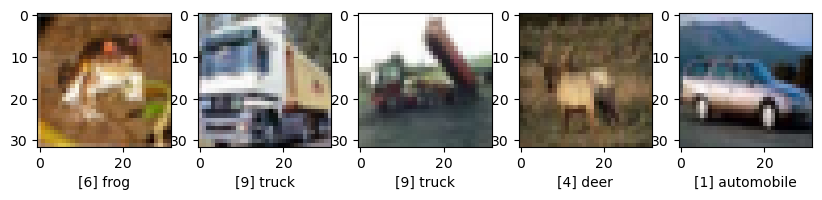

In [35]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(str(y_train[i]) + ' ' + y_train_class_names[i])
plt.show()


The labels appear to match the images. Both axes are scaled from 0 to 31, i.e. 32 x 32 pixels.<br>
Now do the validation data:

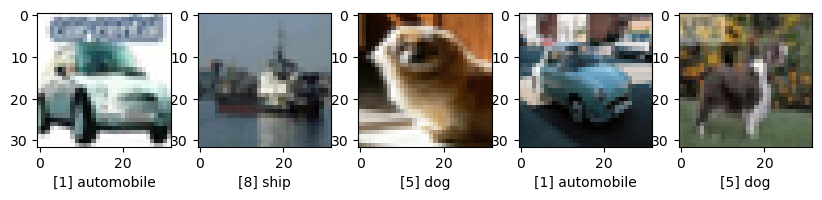

In [37]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_val[i])
    plt.xlabel(y_val[i])
    plt.xlabel(str(y_val[i]) + ' ' + y_val_class_names[i])    
plt.show()

The same goes for validation data.<br>
Now the test data:

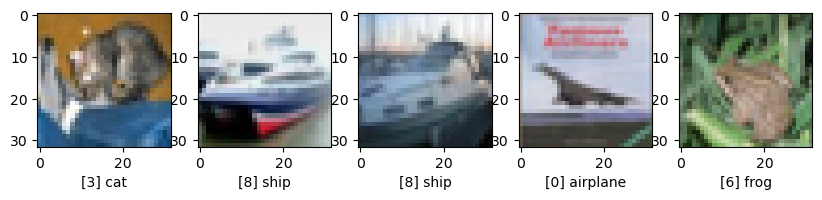

In [36]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
    plt.xlabel(str(y_test[i]) + ' ' + y_test_class_names[i])    
plt.show()

The same goes for the test data. Creating lists of strings for the labels hasn't broken anything (yet).

<h2>Normalize the Data</h2>

In [41]:
# Now normalize the X data for train, val and test sets:
# Convert from 0-255 to 0-1 by dividing by 255

x_train_norm = x_train.astype('float32') / 255.0
x_val_norm = x_val.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Print shapes and data ranges for verification
print("x_train shape:", x_train.shape)
print("x_val   shape:", x_val.shape)
print("x_test  shape:", x_test.shape)
print("x_train_norm shape:", x_train_norm.shape)
print("x_val_norm   shape:", x_val_norm.shape)
print("x_test_norm  shape:", x_test_norm.shape)

print("x_train range:", np.min(x_train), "to", np.max(x_train))
print("x_val   range:", np.min(x_val), "to", np.max(x_val))
print("x_test  range:", np.min(x_test), "to", np.max(x_test))
print("x_train_norm range:", np.min(x_train_norm), "to", np.max(x_train_norm))
print("x_val_norm   range:", np.min(x_val_norm), "to", np.max(x_val_norm))
print("x_test_norm  range:", np.min(x_test_norm), "to", np.max(x_test_norm))


x_train shape: (40000, 32, 32, 3)
x_val   shape: (10000, 32, 32, 3)
x_test  shape: (10000, 32, 32, 3)
x_train_norm shape: (40000, 32, 32, 3)
x_val_norm   shape: (10000, 32, 32, 3)
x_test_norm  shape: (10000, 32, 32, 3)
x_train range: 0 to 255
x_val   range: 0 to 255
x_test  range: 0 to 255
x_train_norm range: 0.0 to 1.0
x_val_norm   range: 0.0 to 1.0
x_test_norm  range: 0.0 to 1.0


<h2>Categorize the Labels</h2>

In [52]:
# Now categorize the Y data (convert 2 to [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] etc.)
y_train_cat = to_categorical(y_train,10)
y_val_cat = to_categorical(y_val,10)
y_test_cat = to_categorical(y_test,10)

print(f'y_train_cat.shape: {y_train_cat.shape}')
print(f'y_val_cat.shape: {y_val_cat.shape}')
print(f'y_test_cat.shape: {y_test_cat.shape}')

y_train_cat.shape: (40000, 10)
y_val_cat.shape: (10000, 10)
y_test_cat.shape: (10000, 10)


<h2>Create the Model</h2>

In [58]:
model = Sequential()
model

<Sequential name=sequential_2, built=False>

First set of layers: Convolutional and Pooling layers

In [62]:
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

Second set of layers: Another Convolutional Layer, Another Pooling Layer

In [64]:
#Since the shape of the data is 32 x 32 x 3 =3072 ... 
#We need to deal with this more complex structure by adding yet another convolutional layer

# *************CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

Last layer: the Classifier into the 10 possible outcomes

In [66]:
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 32)            │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,944 (241.97 KB)

 Trainable params: 61,944 (241.97 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
early_stop

<h2>Run the Model</h2>

In [72]:
history = model.fit(x_train_norm,y_train_cat,epochs=25,validation_data=(x_val_norm,y_val_cat),callbacks=[early_stop])
history

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.1489 - loss: 2.2230 - val_accuracy: 0.1003 - val_loss: 2.3067
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.0994 - loss: 2.3048 - val_accuracy: 0.0997 - val_loss: 2.3028
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.1540 - loss: 2.1867 - val_accuracy: 0.2467 - val_loss: 1.9596
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.2610 - loss: 1.9154 - val_accuracy: 0.2927 - val_loss: 1.8044
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.3093 - loss: 1.7694 - val_accuracy: 0.3477 - val_loss: 1.6694
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.3690 - loss: 1.6486 - val_accuracy: 0.4053 - val_loss: 1.5862
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4172 - loss: 1.5248 - val_accuracy: 0.4419 - val_loss: 1.5083
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4656 -

In [73]:
# let's see what this does:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [76]:
# and this:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.145325,2.231549,0.1003,2.306668
1,0.098300,2.303517,0.0997,2.302765
2,0.190300,2.095235,0.2467,1.959585
3,0.274400,1.869106,0.2927,1.804397
4,0.319750,1.742225,0.3477,1.669439
5,0.381100,1.626263,0.4053,1.586247
6,0.427075,1.515272,0.4419,1.508280
7,0.478325,1.423898,0.4763,1.459054
8,0.525275,1.338459,0.5238,1.354949
9,0.559150,1.260237,0.5629,1.286981


<h2>Training and Validation Losses</h2>

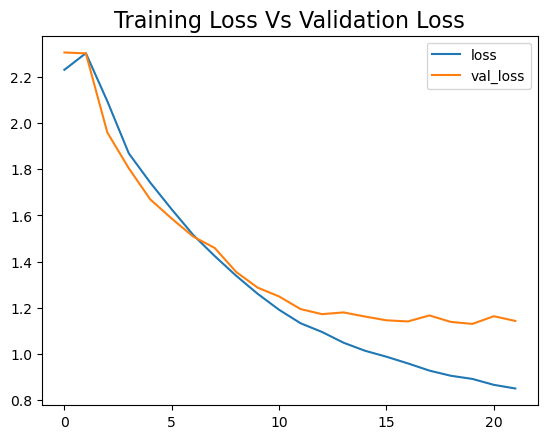

In [77]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

<h2>Training and Validation Accuracies</h2>

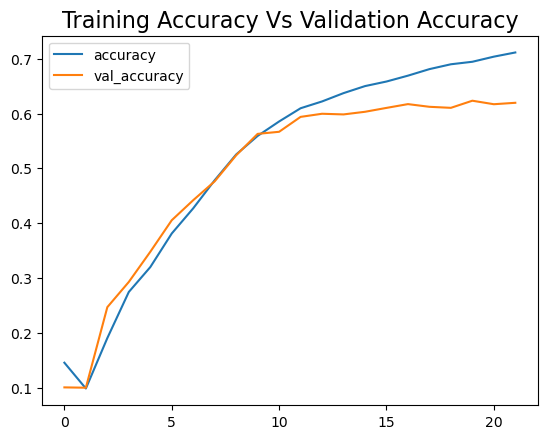

In [78]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

<h2>Use Test Data to Validate</h2>

In [79]:
model.evaluate(x_test_norm,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6185 - loss: 1.1571


[1.170213222503662, 0.6139000058174133]

<h2>Classification Report</h2>

In [124]:
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([3, 1, 8, ..., 5, 0, 7], dtype=int64)

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      1000
           1       0.75      0.81      0.78      1000
           2       0.43      0.52      0.47      1000
           3       0.38      0.48      0.42      1000
           4       0.62      0.40      0.48      1000
           5       0.55      0.52      0.53      1000
           6       0.76      0.66      0.70      1000
           7       0.75      0.61      0.67      1000
           8       0.67      0.83      0.74      1000
           9       0.81      0.64      0.72      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.62     10000
weighted avg       0.63      0.61      0.62     10000



<h2>Confusion Matrix</h2>

In [128]:
confusion_matrix_array = confusion_matrix(y_test,predictions)
confusion_matrix_array

array([[687,  22,  78,  19,  11,   3,   7,   5, 144,  24],
       [ 40, 806,   3,  16,   1,   3,   8,   3,  69,  51],
       [133,   9, 515, 102,  47,  77,  60,   8,  41,   8],
       [ 43,  19, 122, 476,  29, 185,  53,  32,  30,  11],
       [ 52,   7, 216, 100, 396,  49,  59,  96,  18,   7],
       [ 19,   8,  98, 251,  28, 518,  14,  46,  13,   5],
       [ 14,  14, 102, 131,  41,  15, 656,   4,  16,   7],
       [ 23,   7,  53,  98,  79,  92,   5, 611,   9,  23],
       [ 88,  26,   6,  25,   4,   1,   0,   3, 833,  14],
       [ 58, 151,   7,  37,   6,   5,   6,  10,  79, 641]], dtype=int64)

<h2>Precision and Recall</h2>
(Using the Confusion Matrix)

In [133]:
# Headers for True Positives, False Positives, False Negatives, Precision, and Recall
print(f"{'Class':<6} {'True Pos':<10} {'False Pos':<10} {'False Neg':<10} {'Precision':<10} {'Recall':<10}")

# Loop through each class (0-9) and calculate true positives, false pos, false neg, precision and recall
for i in range(10):
    true_positives = confusion_matrix_array[i, i]
    false_positives = np.sum(confusion_matrix_array[:, i]) - true_positives
    false_negatives = np.sum(confusion_matrix_array[i, :]) - true_positives
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)  
    #print(f"Class {i}:   TP={true_positives:<4}   FP={false_positives:<4}   FN={false_negatives:<4}   Precision={precision:.4f}   Recall={recall:.4f}")
    # Aligning columns using string formatting
    print(f"{i:<6} {true_positives:<10} {false_positives:<10} {false_negatives:<10} {precision:<10.4f} {recall:<10.4f}")

Class  True Pos   False Pos  False Neg  Precision  Recall    
0      687        470        313        0.5938     0.6870    
1      806        263        194        0.7540     0.8060    
2      515        685        485        0.4292     0.5150    
3      476        779        524        0.3793     0.4760    
4      396        246        604        0.6168     0.3960    
5      518        430        482        0.5464     0.5180    
6      656        212        344        0.7558     0.6560    
7      611        207        389        0.7469     0.6110    
8      833        419        167        0.6653     0.8330    
9      641        150        359        0.8104     0.6410    


<h2>Three Example Pictures</h2>

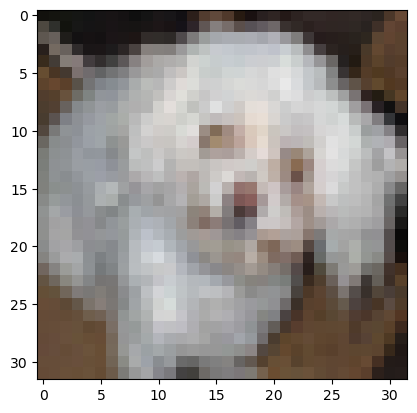

In [97]:
plt.imshow(x_test[1000])

In [98]:
reshaped_image = x_test[1000].reshape(1, 32, 32, 3)

In [99]:
predictions = model.predict(reshaped_image)

# Get the index of the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[5]


In [101]:
print(class_names[predicted_class[0]])

dog


<h2>It Works!!!!</h2>
Try another image from the test set, just to make sure:

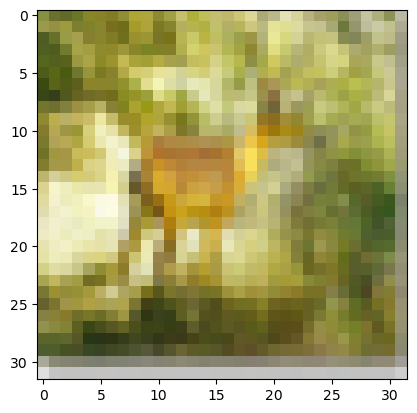

In [104]:
plt.imshow(x_test[500])

In [105]:
reshaped_image = x_test[500].reshape(1, 32, 32, 3)

In [106]:
predictions = model.predict(reshaped_image)

# Get the index of the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[7]


In [107]:
print(class_names[predicted_class[0]])

horse


Looks more like a deer to me<br>
One more try:

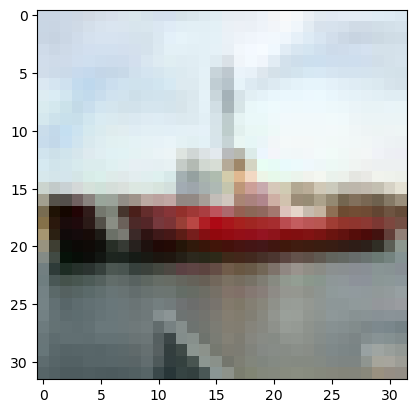

In [116]:
plt.imshow(x_test[1900])

In [120]:
reshaped_image = x_test[1900].reshape(1, 32, 32, 3)

In [121]:
predictions = model.predict(reshaped_image)

# Get the index of the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[8]


In [122]:
print(class_names[predicted_class[0]])

ship


<h2>It got 2 out of 3 right</h2>
I'm quitting while I'm ahead